In [32]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import matplotlib.pyplot as plt
import skimage

%matplotlib inline

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = 0, it's a 'non-cat' picture.


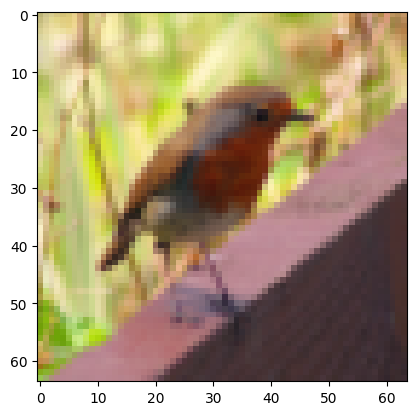

In [3]:
index = 10
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + "), 3")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64), 3
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [5]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*test_set_x_orig.shape[3], train_set_x_orig.shape[0])
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3], test_set_x_orig.shape[0])

print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))
print("sanity check after reshaping: " + str(train_set_x_flatten[0:5, 0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


In [6]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

# Building the parts of the Function

In [7]:
# Graded Function: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    result = 1 / (1 + np.exp(-z))

    return result

In [8]:
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [9]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [12]:
dim = 2
w, b = initialize_with_zeros(dim)
print("w = " + str(w))
print("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [13]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
        Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * (np.sum(np.log(A)*Y + (np.log(1-A))*(1-Y)))

    dw = (np.dot(X, (A-Y).T))/m
    db = float(np.sum(A-Y))/m

    assert(dw.shape == w.shape)
    assert(isinstance(db, float) or isinstance(db, np.floating))
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {
        "dw": dw,
        "db": db
    }

    return grads, cost

In [14]:
w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1.,2.,-1.], [3., 4.,-3.2]]), np.array([[1, 0, 1]])
grads, cost = propagate(w, b, X, Y)

print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost =" + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost =5.801545319394553


In [15]:
# Optimization function

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost= False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- true to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads['dw']
        db = grads['db']

        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}
        
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [16]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


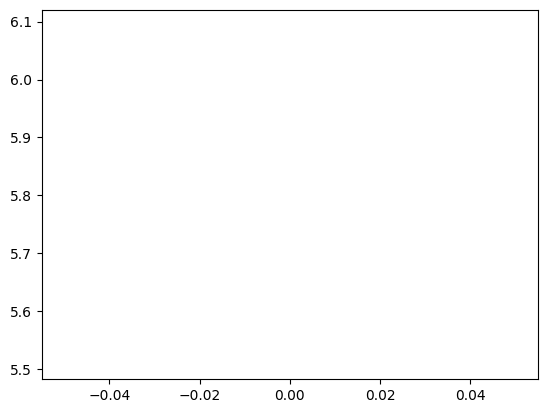

In [17]:
plt.plot(costs)

In [18]:
def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using the learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    # # Working solution 1: Using IF ELSE
    # for i in range(A.shape[1]):
    #     if (A[0,i] >= 0.5):
    #         Y_prediction[0,i] = 1
    #     else:
    #         Y_prediction[0,i] = 0
    # # Working solution 2: ONE LINE
    # for i in range(A.shape[1]):
    #     Y_prediction if A[0,i] >= 0.5 else 0

    Y_prediction = (A >= 0.5) * 1.0

    assert(Y_prediction.shape == (1,m))

    return Y_prediction

In [19]:
w = np.array([[0.1124579], [0.2310677]])
b = -0.3
X = np.array([[1., -1.1, -3.2], [1.2, 2., 0.1]])

print("Predictions = " + str(predict(w, b, X)))

Predictions = [[1. 1. 0.]]


# Merge all Functions into a Model

In [20]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning-rate -- hyperparameter representing the learning rate used in the update rule of optimize()

    Returns:
    d -- dictionary containing information about the model.
    """

    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_predition_test = predict(w, b, X_test)
    Y_predition_train = predict(w, b, X_train)

    print("Train accuracy: {}%".format(100 - np.mean(np.abs(Y_predition_train - Y_train)) * 100))
    print("Test accuracy: {}%".format(100 - np.mean(np.abs(Y_predition_test - Y_test)) * 100))

    d = {
        "costs" : costs,
        "Y_prediction_test": Y_predition_test,
        "Y_prediction_train": Y_predition_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }

    return d

In [21]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=5000, learning_rate=0.005, print_cost=False)

Train accuracy: 97.60765550239235%
Test accuracy: 34.0%


y = 1, you predicted that it is a "non-cat" picture.


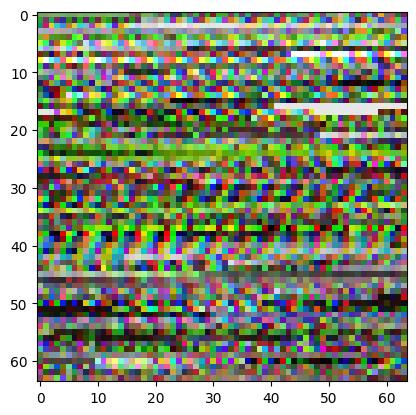

In [22]:
# Example of a picture that was wrongly classified
index = 25
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
pred = int(d["Y_prediction_test"][0, index])
print("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[pred].decode("utf-8") + "\" picture.")

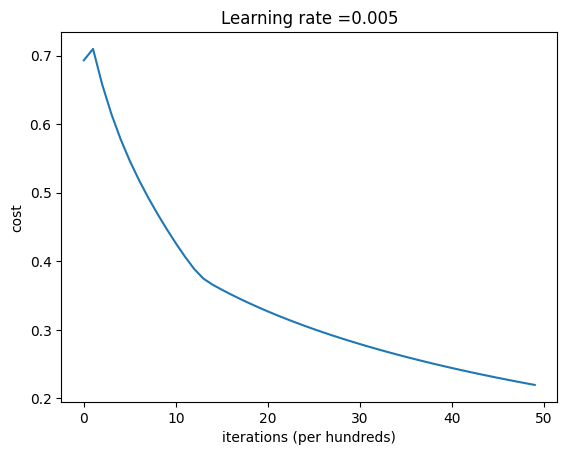

In [23]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

# Choice of Learning Rate

Learning rate is: 0.01
Train accuracy: 71.29186602870814%
Test accuracy: 34.0%

---------------------------------------------------------------

Learning rate is: 0.001
Train accuracy: 74.16267942583733%
Test accuracy: 34.0%

---------------------------------------------------------------

Learning rate is: 0.0001
Train accuracy: 66.02870813397129%
Test accuracy: 34.0%

---------------------------------------------------------------



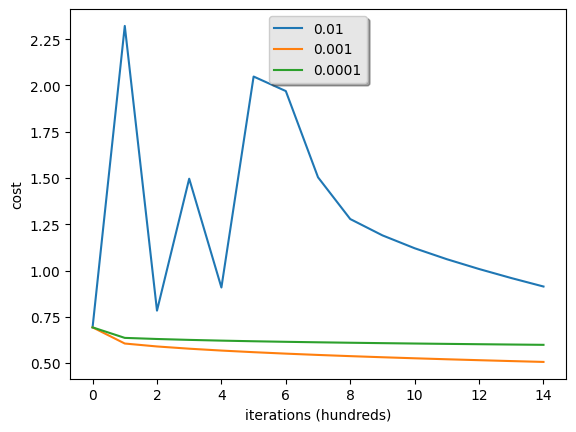

In [24]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("Learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=i, print_cost=False)
    print('\n' + "---------------------------------------------------------------" + "\n")

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = 0.0, your algorithm predicts a "non-cat" picture.


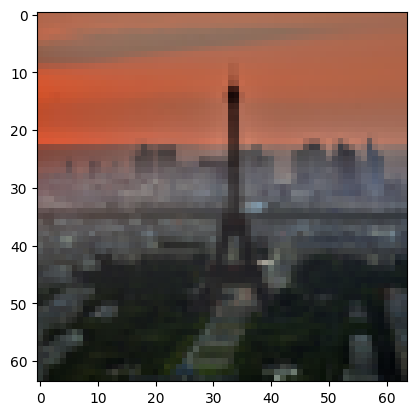

In [34]:
my_image = "la_defense.jpg"

# We preprocess the image to fit your algorithm
fname = "images/" + my_image
# image = np.array(ndimage.imread(fname, flatten=False))
image = Image.open(fname)
image = np.array(image.resize((num_px, num_px)))
image = image/255
my_image = skimage.transform.resize(image, (num_px, num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")